# Modelling the spread and control of Disease X using a compartmental model

## Abstract

This project uses a compartmental SEAIR model implemented in R to simulate Disease X's epidemic dynamics and evaluate the impact of a vaccination intervention. Using epidemiological data, the model provides insights into the spread, intervention effectiveness, and public health implications, highlighting a significant reduction in symptomatic cases and mortality with vaccination.

---

## Introduction
Disease X is a newly discovered infectious disease of humans. It is directly transmitted (requiring no vectors) and has the following characteristics:

**Natural history**:
  - After infection, individuals experience an incubation period during which they are not infectious.
  - An asymptomatic infectious phase follows, during which individuals can transmit the disease before developing symptoms.
  - All infections eventually result in symptoms, initially believed to be mild, with no disease-related mortality.
  - Once recovered, individuals are thought to be immune to reinfection.


**Epidemiological insights from other regions**:
  - The incubation period averages 5 days.
  - People can be infectious for 3 days before showing symptoms.
  - 10% of infections result in severe illness, with the remainder experiencing mild symptoms.
  - Recovery times vary:
    - Mild cases recover in ~7 days.
    - Severe cases recover in ~14 days (if survived).
  - Severe cases have a 60% chance of mortality.
  - At the peak of the epidemic, approximately 10% of the population is symptomatic.

---


## Objectives
1. Model the natural history of Disease X, considering its unique epidemiological characteristics.
2. Calibrate the model to estimate the infection rate, $\beta$ for specific epidemic outcomes.
3. Determine the basic reproduction number, $𝑅_0$, and the proportion of the population that ultimately dies from the disease.
4. Evaluate the impact of a leaky vaccine with 50% population coverage on the epidemic dynamics.

This project demonstrates skills in compartmental modelling, epidemiological parameter estimation, and intervention evaluation.

---

## Epidemiological characteristics

Based on the scenario provided, key aspects of Disease X's epidemiology are derived as follows:
- **Incubation period**: 5 days (average).
- **Asymptomatic infectious phase**: 3 days before symptoms appear.
- **Symptom progression**:
  - 90% develop mild symptoms.
  - 10% develop severe symptoms, with a 60% chance of mortality.
- **Recovery periods**:
  - Mild cases: ~7 days.
  - Severe cases (if survived): ~14 days.
- **Immunity**: Recovered individuals cannot be reinfected.
- At the peak of the epidemic, approximately 10% of the population is symptomatic.

---

## Methodology

This project uses a compartmental modelling approach with the following steps:

1. **Model specification**:
   - Define key epidemiological assumptions.
   - Define compartments, transitions, and governing equations.
   - Determine all possible epidemiological parameters based on the information provided.
   - Simulate model to generate baseline output prior to parameter calibration.
2. **Model calibration**:
   - Simulate the epidemic to match observed outcomes, such as symptomatic prevalence.
   - Estimate the infection rate $\beta$.
   - Calculate $𝑅_0$ and the proportion of the population that ultimately dies from Disease X.
3. **Intervention**:
   - Introduce a vaccination strategy to reduce susceptibility and infectivity.
   - Simulate the intervention.
   - Compare outcomes with and without intervention.



### Model Specification

#### A. Define key epidemiological assumptions
Some epidemiological assumptions must be made prior to constructing our compartmental model. In this case, the following assumptions are made:
- There is homogenous population mixing
- The transition rates between compartments are fixed

#### B. Define compartments, transitions, and governing equations
The natural history of Disease X is represented using a SEAIR model, with extensions for severe illness and mortality. The compartments are:
- **$S$**: Susceptible
- **$E$**: Exposed
- **$A$**: Asymptomatic infectious
- **$I_m$**: Symptomatic (mild illness)
- **$I_s$**: Symptomatic (severe illness)
- **$R$**: Recovered
- **$M$**: Mortality

Based on the information above, we came up with the following model structure:

<img src="model_structure.png" alt="Model Structure" style="width:70%;">

Where:
- $p$ = proportion of symptomatic individuals who develop severe illness
- $\lambda$ = force of infection
- $\delta$ = rate of transition from Exposed ($E$) to Asymptomatic Infectious ($A$)
- $\alpha$ = rate of transition from Asymptomatic ($A$) to Symptomatic ($I_m$ or $I_s$)
- $\gamma_m$ = recovery rate from mild symptoms ($I_m$ to $R$)
- $\gamma_s$ = rrecovery rate from severe illness ($I_s$ to $R$)
- $\mu$ = mortality rate for severe illness ($I_s$ to $M$)

The governing equations are as follows:

$$
\frac{dS}{dt} = -\lambda S
$$

$$
\frac{dE}{dt} = \lambda S - \delta E
$$

$$
\frac{dA}{dt} = \delta E - \alpha A
$$

$$
\frac{dI_m}{dt} = (1 - p) \cdot \alpha A - \gamma_m I_m
$$

$$
\frac{dI_s}{dt} = p \cdot \alpha A - (\mu + \gamma_s) I_s
$$

$$
\frac{dR}{dt} = \gamma_m I_m + \gamma_s I_s
$$

$$
\frac{dM}{dt} = \mu I_s
$$

#### C. Determine all possible epidemiological parameters based on the information provided

- **Proportion of symptomatic individuals who develop severe illness, $p$ = 0.1**  
   Note: Recall that 10% of those infected progressed to severe illness

- **Transition rate from Exposed ($E$) to Asymptomatic Infectious ($A$)**  
   With an average incubation period of 5 days, the rate of transition from compartment E to compartment A is:

   $$
   \delta = \frac{1}{5} \ \text{days}^{-1}
   $$

- **Transition rate from Asymptomatic ($A$) to Symptomatic ($I_m$ or $I_s$)**  
   With an average infectious period of 3 days before symptoms appear, the rate of transition from compartment A to compartment $I_m$ or $I_s$ is:
   

   $$
   \alpha = \frac{1}{3} \ \text{days}^{-1}
   $$

- **Recovery rate from mild symptoms ($I_m$ to $R$)**  
   Recovery occurs on average in 7 days; therefore, the rate of recovery from mild symptoms is:

   $$
   \gamma_m = \frac{1}{7} \ \text{days}^{-1}
   $$

- **Recovery rate from severe illness ($I_s$ to $R$)**  
   Survivors recover on average in 14 days; therefore, the rate of recovery from severe illness is:

   $$
   \gamma_s = \frac{1}{14} \ \text{days}^{-1}
   $$

- **Mortality rate for severe illness ($\mu$)**  
   Given that those with severe illness have a 60% chance of mortality, the mortality rate of severe illness, 𝜇𝜇, can be calculated using the following formula:

   $$
   \frac{\mu}{\mu + \gamma_s} = 0.6
   $$

   Rearranging:

   $$
   \mu = 0.6 \cdot \gamma_s \cdot \frac{1}{1 - 0.6}
   $$

   Substituting $\gamma_s = \frac{1}{14}$:

   $$
   \mu = 0.6 \cdot \left(\frac{1}{14}\right) \cdot \frac{1}{0.4}
   $$

   Simplifies to:

   $$
   \mu = 0.1071 \ \text{days}^{-1}
   $$

- **Determining the force of infection, $\lambda$**:

Based on the model structure and governing equations above, the equation for the force of infection, $\lambda$ is:

$$
\lambda = \beta_A \frac{A}{N} + \beta_{Im} \frac{I_m}{N} + \beta_{Is} \frac{I_s}{N}
$$

However, in the absence of further information and to reduce complexity, it was decided that the rate of infection for asymptomatic and symptomatic individuals (mild and severe illness) will be the same. That is:

$$
\beta = \beta_A = \beta_{Im} = \beta_{Is}
$$

Hence, $\lambda$ can be written as:

$$
\lambda = \beta \frac{A}{N} + \beta \frac{I_m}{N} + \beta \frac{I_s}{N}
$$

Simplified further as:

$$
\lambda = \beta \frac{(A + I_m + I_s)}{N}
$$

This leaves us with **one remaining parameter to be calculated**: $\beta$, as no information has been provided to estimate it at this point.

#### D. Simulate model to generate baseline output prior to parameter calibration

Recall that data from other countries suggest that at the peak of the epidemic, approximately 10% of the population are symptomatic (bearing in mind symptomatic refers to those in compartments $I_m$ and $I_s$).

Assuming that N = total population, this means that at the peak of th epidemic, 0.1 x N people are symptomatic.

With this information, we can calibrate β manually by trial-and-error.

Assuming that N = 1,000,000, this means that approximately 100,000 infected individuals should be symptomatic at the peak of the epidemic:

In [1]:
0.1 * 1000000

[1] 1e+05

We will begin manual calibration by giving $\beta$ a value of 0.5 (an arbitrary starting value). This corresponds to an infection rate of 0.5 days$^{-1}$. 

In [2]:
# Load required packages
library(deSolve)
library(ggplot2)
library(reshape2)

In [3]:
# Model Inputs
# Total population size for the city where Disease X is spreading
N <- 1000000

In [4]:
# Proportion of symptomatic individuals who develop severe illness
p <- 0.1

In [5]:
# Initial state values: population distribution across compartments
# Disease X starts with one infected individual; no one is immune or exposed initially
initial_state_values <- c(S=N-1, # Susceptible: entire population except one infected case
                          E=0,   # Exposed: no initial exposure
                          A=0,   # Asymptomatic: no initial asymptomatic infections
                          Im=1,  # Mildly symptomatic: one initial case
                          Is=0,  # Severely symptomatic: no severe cases initially
                          R=0,   # Recovered: no prior immunity
                          M=0)   # Mortality: no deaths initially

In [6]:
# Parameter values for Disease X, based on its natural history
# All parameters are in units of days^-1
parameters <- c(beta=0.5,        # Infection rate; initially set as an arbitrary value
                delta=1/5,       # Transition from exposed to infectious (1/incubation period; 5 days)
                alpha=1/3,       # Transition from asymptomatic to symptomatic (3 days)
                gamma_m=1/7,     # Recovery rate from mild symptoms (7-day average)
                gamma_s=1/14,    # Recovery rate from severe illness (14-day average)
                mu=0.6*(1/14)/(1-0.6)) # Mortality rate for severe cases (60% chance of death)


Before we proceed further, we need to set timepoints for the simulation. I chose to simulate daily changes over one year:

In [7]:
# Timepoints for simulation: simulate daily changes over one year
time <- seq(from=0, to=365, by=1)

We are now ready to simulate our SEAIR model:

In [8]:
# SEAIR Model Function
# Implements the system of differential equations for Disease X dynamics
seair_model <- function(time, state, parameters) {
  with(as.list(c(state, parameters)), {
    # Total population size (sum of all compartments)
    N <- S + E + A + Im + Is + R + M
    
    # Force of infection (lambda): rate of new exposures
    lambda <- beta * (A + Im + Is) / N
    
    # Differential equations for compartment transitions
    dS <- -lambda * S                          # Susceptible individuals become exposed
    dE <- lambda * S - delta * E               # Exposed individuals become asymptomatic
    dA <- delta * E - alpha * A                # Asymptomatic individuals become symptomatic
    dIm <- (1 - p) * alpha * A - gamma_m * Im  # Mild cases recover
    dIs <- p * alpha * A - (gamma_s + mu) * Is # Severe cases recover or die
    dR <- gamma_m * Im + gamma_s * Is          # Recovered individuals
    dM <- mu * Is                              # Deaths from severe cases
    
    # Return rates of change for each compartment
    return(list(c(dS, dE, dA, dIm, dIs, dR, dM)))
  })
}

In [9]:
# MODEL OUTPUT:
# Solving the differential equations using the ode integration algorithm
output <- as.data.frame(ode(y=initial_state_values,
                            times=time,
                            parms=parameters,
                            func=seair_model))

In [10]:
# Turn output dataset into long format
output_long <- melt(as.data.frame(output), id="time")

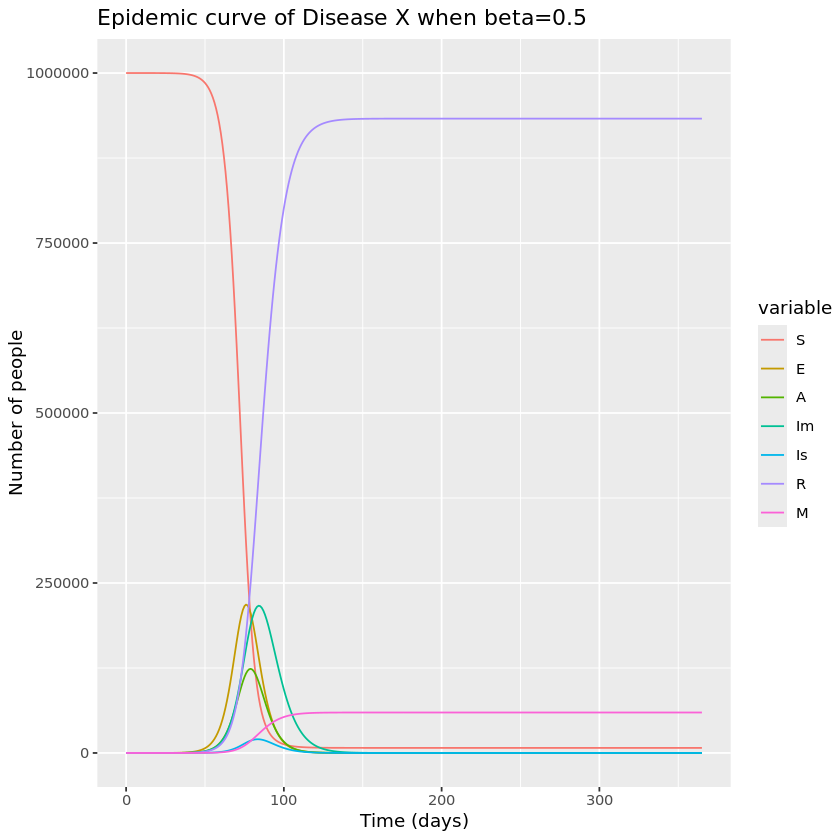

In [11]:
#Plot the model
ggplot(data=output_long, aes(x=time, y=value, colour=variable, group=variable)) +
  geom_line() + xlab("Time (days)") + ylab("Number of people") + labs(title="Epidemic curve of Disease X when beta=0.5")



### Model Calibration

We calibrate the infection rate, $\beta$ such that 10% of the population is symptomatic at the epidemic's peak. The calibrated model is then used to calculate:
- The basic reproduction number, $𝑅_0$.
- The proportion of the population that ultimately dies from Disease X.

Before we start calibrating, let's review the number of symptomatic individuals at the peak of the epidemic from the initial model above, where $\beta$ was arbitrarily set to 0.5.  

Since symptomatic individuals are contained within compartments $I_m$ and $I_s$, we need to add the outputs for these two compartments together to obtain the total number of symptomatic individuals:

In [12]:
# Calculating the prevalence of symptomatic people at the peak of the epidemic when beta = 0.5:
output$symp <- output$Im + output$Is # new variable to capture prevalence of symptomatic individuals at each timestep

In [13]:
max(output$symp) # prevalence of symptomatic individuals at the peak of the epidemic when beta = 0.5

[1] 236704.4

As shown above, when $\beta$ = 0.5 days$^{-1}$, the prevalence of symptomatic individuals at the peak of the epidemic is approximately 237000, which is almost 2.4 times what the data suggests (recall that the number we are expecting is 100,000).

Reducing $\beta$ to 0.2 days$^{-1}$ gives us a total of almost 80000 symptomatic individuals at the peak of the epidemic:

In [14]:
# Reducing beta to 0.2:
parameters <- c(beta=0.2, # the infection rate; 0.5 chosen as an arbitrary starting value
                delta=1/5, # rate of transition from compartment E to A (1/incubation period)
                alpha=1/3, # rate of becoming symptomatic
                gamma_m=1/7, # rate of recovery from mild symptoms (average 1 week, i.e., 7 days)
                gamma_s=1/14, # rate of recovery from severe illness (average 2 weeks, i.e., 14 days)
                mu=0.6*(1/14)/(1-0.6)) # rate of severe-illness-induced mortality; calculation as explained in 1c

output <- as.data.frame(ode(y=initial_state_values,
                            times=time,
                            parms=parameters,
                            func=seair_model))

output$symp <- output$Im + output$Is  
max(output$symp) # prevalence of symptomatic individuals at the peak of the epidemic when beta = 0.2

[1] 78737.6

**Further trial-and-error** found that the best value for $\beta$ is approximately **0.224691**, as demonstrated in the code below:

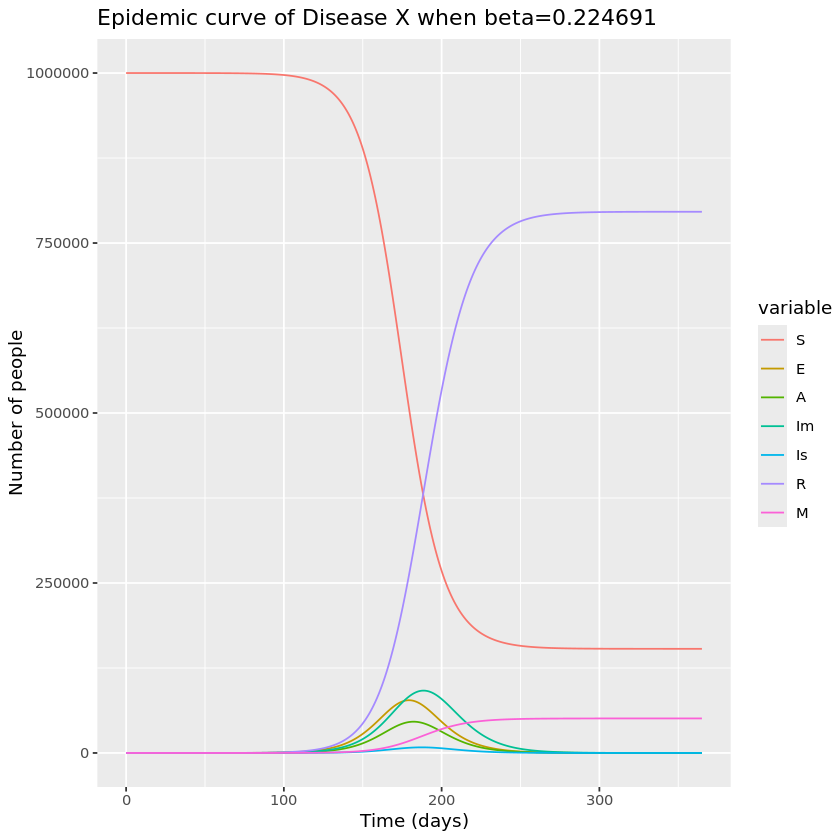

In [15]:
# Beta set to 0.224691:
parameters <- c(beta=0.224691, # rate of infection
                delta=1/5, # rate of transition from compartment E to A (1/incubation period)
                alpha=1/3, # rate of becoming symptomatic
                gamma_m=1/7, # rate of recovery from mild symptoms (average 1 week, i.e., 7 days)
                gamma_s=1/14, # rate of recovery from severe illness (average 2 weeks, i.e., 14 days)
                mu=0.6*(1/14)/(1-0.6)) # rate of severe-illness-induced mortality

#MODEL OUTPUT (beta=0.224691)
# Solving the differential equations using the ode integration algorithm
output <- as.data.frame(ode(y=initial_state_values,
                            times=time,
                            parms=parameters,
                            func=seair_model))

# Turn output dataset into long format
output_long <- melt(as.data.frame(output), id="time")

#Plot the model
ggplot(data=output_long, aes(x=time, y=value, colour=variable, group=variable)) +
  geom_line() + xlab("Time (days)") + ylab("Number of people") + 
  labs(title="Epidemic curve of Disease X when beta=0.224691")

In [16]:
# Calculating the prevalence of symptomatic people at the peak of the epidemic when beta = 0.224691:
output$symp <- output$Im + output$Is  

max(output$symp) # prevalence of symptomatic individuals at the peak of the epidemic when beta=0.224691 (Answer: 100000.7) 

[1] 100000.7

Output obtained from the above code shows that when beta = 0.224691, roughly 100,000 individuals (i.e., 10% of the population) are symptomatic at the peak of the epidemic, consistent with data from other countries.

We can further illustrate this by plotting the prevalence of symptomatic individuals as shown below. Note how the peak of the graph corresponds to approximately 100000 individuals (0.1*N).

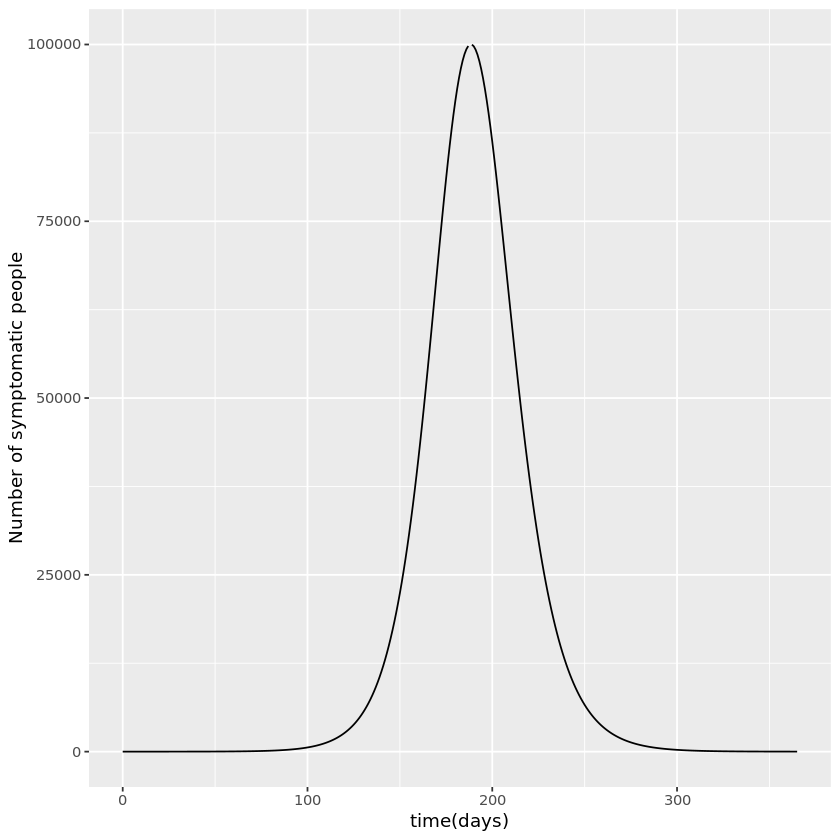

In [17]:
ggplot(data=output, aes(x=time, y=symp)) + geom_line() + xlab("time(days)") +
ylab("Number of symptomatic people") + ylim(0, 100000)

We can also determine which day of the year coincides with the peak of symptomatic cases (in this case, it is Day 188):

In [18]:
output[which.max(output$symp),] #Day of peak prevalence of symptomatic cases

,time,S,E,A,Im,Is,R,M,symp
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
189,188,383986.3,70116.3,44047.12,91713.33,8287.38,376711,25138.53,100000.7


#### Calculating the basic reproduction number, $𝑅_0$

As discussed earlier, 𝜆 is represented by:
$$
\lambda = \beta \frac{(A + I_m + I_s)}{N}
$$

Given this and the model structure, $R_0$ can also be written as:

$$
𝑅_0 = \frac \beta \alpha + \frac{\beta(1-p)}{𝛾_m} + \frac{\beta(p)}{𝜇+𝛾_𝑠}
$$

Further simplified as:

$$
𝑅_0 = 𝛽(\frac{1}{𝛼} + \frac{(1−𝑝)}{𝛾_m} + \frac{𝑝}{𝜇+𝛾_𝑠})
$$

With this equation in mind, let's calculate our $R_0$:

In [19]:
# Calculating R0
#Reiterating the parameters
beta <- 0.224691 # infection rate
delta <- 1/5 # incubation period (rate of transition from being exposed to becoming asymptomatic)
alpha <- 1/3 # rate of becoming symptomatic
gamma_m <- 1/7 # rate of recovery from mild symptoms (average 1 week, i.e. 7 days)
gamma_s <- 1/14 # rate of recovery from severe illness (average 2 weeks, i.e. 14 days)
mu <- 0.6*(1/14)/(1-0.6) # rate of severe-illness-induced mortality
R0 <- beta * ((1/alpha) + (1-p)/gamma_m + p/(mu + gamma_s))
print(R0)

[1] 2.215453


The value of $R_0$ for this simulated epidemic is **2.215453**.

#### Calculating proportion of the population that dies from Disease X

Recall that our SEAIR model has a mortality compartment, $M$, incorporated into it. To calculate the proportion of the population that ultimately dies from Disease X, we simply retrieve the maximum value of this compartment, and divide it with the total population, $N$ (which we had earlier assumed to be 1,000,000):

In [20]:
# Proportion of individuals who die from severe illnes due to Disease X at the end of the epidemic
max(output$M)/N

[1] 0.05080803

The proportion of population that ultimately dies from Disease X is **5.08%**.




## Intervention

Now that we have our SEAIR model calibrated, let's model how an intervention could be used against Disease X. For the purpose of this exercise, I have chosen:

**Intervention**: A novel vaccine with a combined leaky effect.

How it impacts the dynamics of the infection:
- Reduces susceptibility towards infection by 60%
- Reduces infectivity of those who become infected (despite being vaccinated) by half

By having the above properties, the vaccine is expected to reduce the number of symptomatic individuals at the peak of the epidemic, and number of deaths at the end of the epidemic. At this point, it is not yet known whether vaccine-induced immunity is lifelong or wanes over time. For the purpose of this simulation, we are going to assume that there is no waning of vaccine-induced immunity.

New parameters to be included:

$c_s$ = effectiveness of the vaccine in reducing susceptibility of vaccinated people
- A $c_s$ of 0.4 indicates that the vaccine efficacy in terms of reducing susceptibility is (1 - $c_s$) x 100 = 60%.
  
$c_i$ = effectiveness of the vaccine in reducing infectivity of vaccinated people
- A $c_i$ of 0.5 indicates that the vaccine efficacy in terms of reducing infectivity is (1 - $c_i$) x 100 = 50%; i.e, infected individuals who have been vaccinated are only half as infectious as those who have never been vaccinated.

Updated model structure for a combined leaky vaccine:

<img src="model_structure_2.png" alt="Model Structure" style="width:70%;">

| Compartment | Description                                   |
|-------------|-----------------------------------------------|
| S           | Susceptible (uninfected)                     |
| E           | Exposed but not infectious (latent)          |
| A           | Asymptomatic (*infectious*)                  |
| I<sub>m</sub> | Mild symptoms (*infectious*)                |
| I<sub>s</sub> | Severe illness (*infectious*)               |
| M           | Died from severe illness (Disease X-induced) |
| V           | Vaccinated                                            |
| Ev          | Vaccinated & exposed but not infectious (latent)    |
| Av          | Vaccinated & asymptomatic (*infectious*)            |
| Iv<sub>m</sub> | Vaccinated & with mild symptoms (*infectious*)      |
| Iv<sub>s</sub> | Vaccinated & with severe illness (*infectious*)     |
| Mv          | Vaccinated & died from severe illness (Disease X-induced) |


Given the updated model structure, we must also update our force of infection, 𝜆, which is now represented by:

$$
\lambda = \beta \frac{(A + I_m + I_s)}{N} + c_i\beta \frac{(A_v + Iv_m + Is_v)}{N}
$$

Our updated governing equations are as follows:

1. **Unvaccinated Population**:

$$
\frac{dS}{dt} = -\lambda S
$$

$$
\frac{dE}{dt} = \lambda S - \delta E
$$

$$
\frac{dA}{dt} = \delta E - \alpha A
$$

$$
\frac{dI_m}{dt} = (1 - p) \cdot \alpha A - \gamma_m I_m
$$

$$
\frac{dI_s}{dt} = p \cdot \alpha A - (\mu + \gamma_s) I_s
$$

$$
\frac{dM}{dt} = \mu I_s
$$

2. **Vaccinated Population**:

$$
\frac{dV}{dt} = -c_s \lambda V
$$

$$
\frac{dEv}{dt} = c_s \lambda V - \delta Ev
$$

$$
\frac{dAv}{dt} = \delta Ev - \alpha Av
$$

$$
\frac{dIv_{m}}{dt} = (1 - p) \cdot \alpha Av - \gamma_m Iv_{m}
$$

$$
\frac{dIv_{s}}{dt} = p \cdot \alpha Av - (\mu + \gamma_s) Iv_{s}
$$

$$
\frac{dMv}{dt} = \mu Iv_{s}
$$

3. **Recovered Population**:

$$
\frac{dR}{dt} = \gamma_m (I_m + Iv_{m}) + \gamma_s (I_s + Iv_{s})
$$


#### Simulating intervention using R

As mentioned earlier, two new parameters must be included in this model:

$c_s$ = effectiveness of the vaccine in reducing susceptibility of vaccinated people

$c_i$ = effectiveness of the vaccine in reducing infectivity of vaccinated people



Modelling the impact of a combined leaky vaccine with 50% coverage:

In [21]:
# vaccine coverage
q <- 0.5 # 50% coverage i.e., half of the population

In [22]:
#Initial number of people in each compartment
initial_state_values <- c(S=(1-q)*(N-1), #the unvaccinated proportion of the population is susceptible
                          E=0, #no unvaccinated individual exposed at the beginning of the simulation
                          A=0, #no unvaccinated individual asymptomatic at the beginning of the simulation
                          Im=1, #the epidemic starts with a single infected person (unvaccinated, with mild symptoms)
                          Is=0, #no unvaccinated individual is infected with severe illness at the beginning of the simulation
                          V=q*(N-1), # a proportion 'p' of the population that is vaccinated (vaccination coverage)
                          Ev=0, #no vaccinated individual exposed at the beginning of the simulation
                          Av=0, #no vaccinated individual asymptomatic at the beginning of the simulation
                          Ivm=0, #no vaccinated individual is infected with mild symptoms at the beginning of thesimulation
                          Ivs=0, #no vaccinated individual infected with severe illness at the beginning of the simulation
                          M=0, #no unvaccinated individual has died at the beginning of the simulation
                          Mv=0, # no vaccinated individual has died at the beginning of the simulation
                          R=0) # there is no prior immunity in the population

In [23]:
#Parameters describing the transition rates (in units of days^-1)
parameters <- c(beta=0.224691, # the infection rate
                delta=1/5, # incubation period (rate of transition from being exposed to becoming asymptomatic)
                alpha=1/3, # rate of becoming symptomatic
                gamma_m=1/7, # rate of recovery from mild symptoms (average 1 week, ie 7 days)
                gamma_s=1/14, # rate of recovery from severe illness (average 2 weeks, ie 14 days)
                mu=0.6*(1/14)/(1-0.6), # rate of severe-illness-induced mortality
                c_s = 0.4, #the reduction in the force of infection acting on those who are vaccinated
                c_i = 0.5) # the reduction in the infectivity of infected vaccinated people

In [24]:
# TIMESTEPS:
# Sequence of timesteps to solve the model at
time <- seq(from=0,to=1000, by=1) # from 0 to 1000 days in daily intervals

In [25]:
# MODEL FUNCTION:
vaccine_model <- function(time, state, parameters){
  
  with(as.list(c(state, parameters)),{
    
    # Calculating the total population size, N
    N <- S+E+A+Im+Is+V+Ev+Av+Ivm+Ivs+M+Mv+R
    
    # Defining lambda (incorporating vaccinated compartments)
    lambda <- beta*(A+Im+Is)/N + c_i*beta*(Av+Ivm+Ivs)/N
    
    # Updated differential equations
    dS <- -lambda*S
    dE <- lambda*S - delta*E
    dA <- delta*E - alpha*A
    dIm <- (1-p)*alpha*A- gamma_m*Im
    dIs <- p*alpha*A - (gamma_s + mu)*Is
    dV <- -c_s*lambda*V
    dEv <- c_s*lambda*V - delta*Ev
    dAv <- delta*Ev - alpha*Av
    dIvm <- (1-p)*alpha*Av- gamma_m*Ivm
    dIvs <- p*alpha*Av - (gamma_s + mu)*Ivs
    dM <- mu*Is
    dMv <- mu*Ivs
    dR <- gamma_m*(Im + Ivm) + gamma_s*(Is + Ivs)
    
    # Return the number of people in each compartment at each timestep (in the same order as the input state variables)
    return(list(c(dS, dE, dA, dIm, dIs, dV, dEv, dAv, dIvm, dIvs, dM, dMv, dR)))
  })
}

In [26]:
# MODEL OUTPUT:
# Solving the differential equations using the ode integration algorithm
output_vacc <- as.data.frame(ode(y=initial_state_values,
                            times=time,
                            parms=parameters,
                            func= vaccine_model))

In [27]:
# Turn output dataset into long format
output_long_vacc <- melt(as.data.frame(output_vacc), id="time")

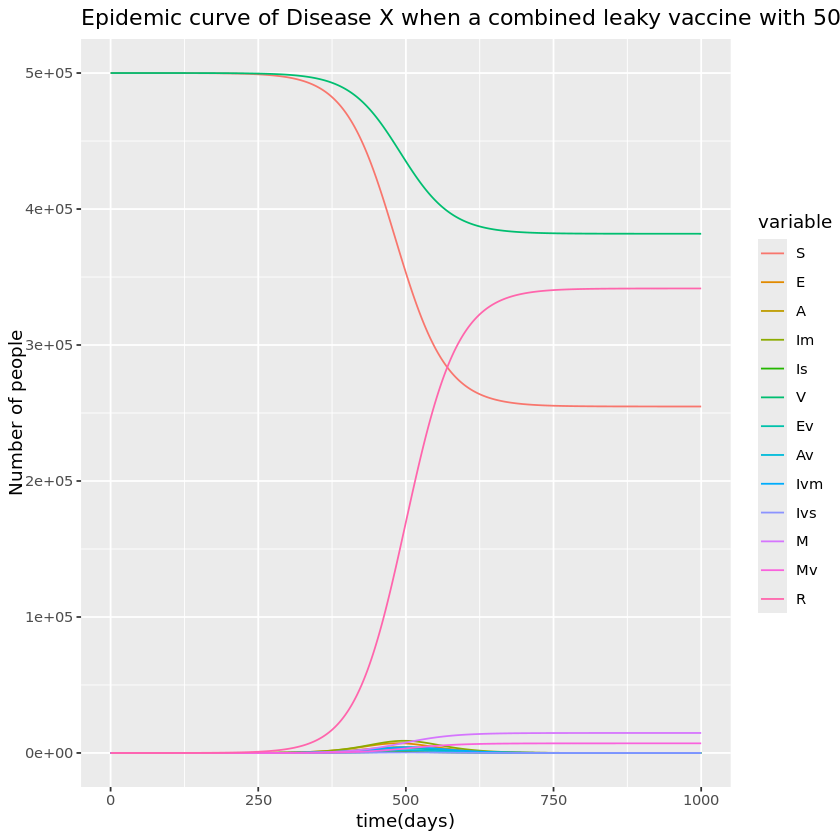

In [28]:
# Plot the model
ggplot(data=output_long_vacc, aes(x=time, y=value, colour=variable, group=variable)) + 
  geom_line() + xlab("time(days)") + ylab("Number of people") + 
  labs(title="Epidemic curve of Disease X when a combined leaky vaccine with 50% coverage is administered")


Calculating the prevalence of symptomatic people at the peak of the epidemic when a combined leaky vaccine with a coverage of 50% is administered (symptomatic people must now include those in compartments $Iv_m$ & $Iv_s$):

In [31]:
output_vacc$symp_vacc <- output_vacc$Im + output_vacc$Is + output_vacc$Ivm + output_vacc$Ivs

In [32]:
max(output_vacc$symp_vacc) #Prevalence of symptomatic cases at the peak of the epidemic (Answer: 14370.93443967)

[1] 14370.93

Calcuting the proportion of population that dies from severe illness when a combined leaky vaccine with a coverage of 50% is administered:

In [33]:
max(output_vacc$M + output_vacc$Mv)/N #Answer: 0.02180317

[1] 0.02180317

Determining the day of peak prevalence of symptomatic cases when a combined leaky vaccine with a coverage of 50% is administered:

In [34]:
output_vacc[which.max(output_vacc$symp_vacc),] #Day of peak prevalence of symptomatic cases

,time,S,E,A,Im,Is,V,Ev,Av,Ivm,Ivs,M,Mv,R,symp_vacc
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
500,499,354525.2,7015.106,4240.99,8945.226,796.0807,435753.2,3408.862,2046.61,4250.258,379.3699,7575.446,3299.829,167763.9,14370.93


### Impact of vaccination
Our modelling analysis suggests that administering a combined leaky effect to half of the population leads to the following benefits:
1. Prevalence of symptomatic individuals at the peak of the epidemic **reduced from 100,000 (without intervention)** to **14,370 individuals (with intervention)**

2. Proportion who ultimately dies from Disease X **reduced by more than 50%: from 5.08% to 2.18%**
3. **Peak of the epidemic occured much later**, at 499 days after introduction of an infected case, compared to 188 days without vaccination

The following graphs illustrate points (1) and (2), where the number of symptomatic individuals and number of deaths is reduced with vaccination of 50% of the population:

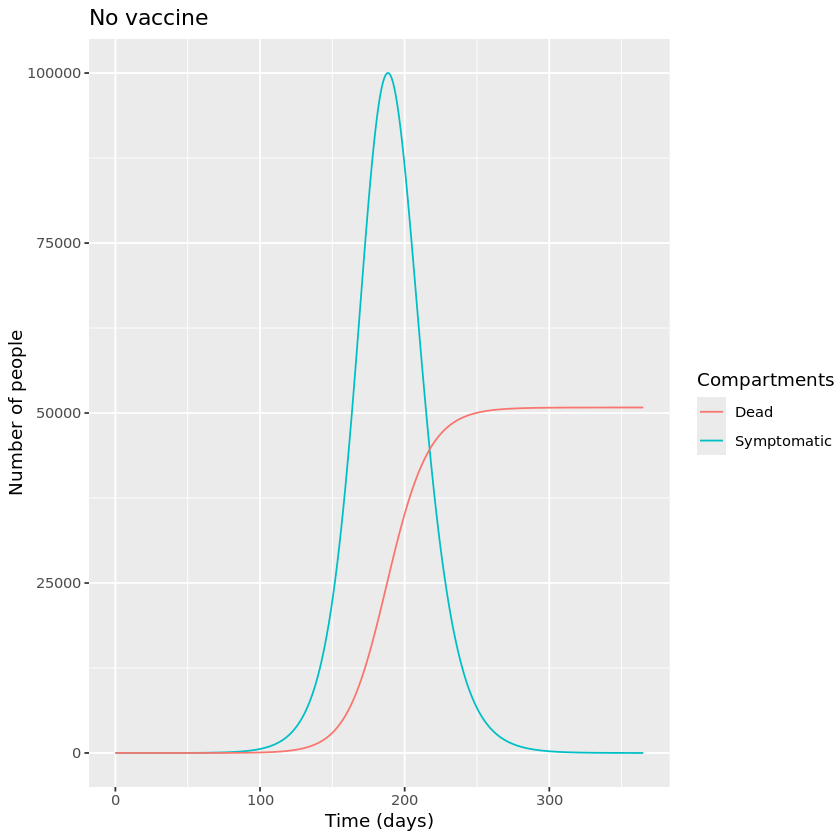

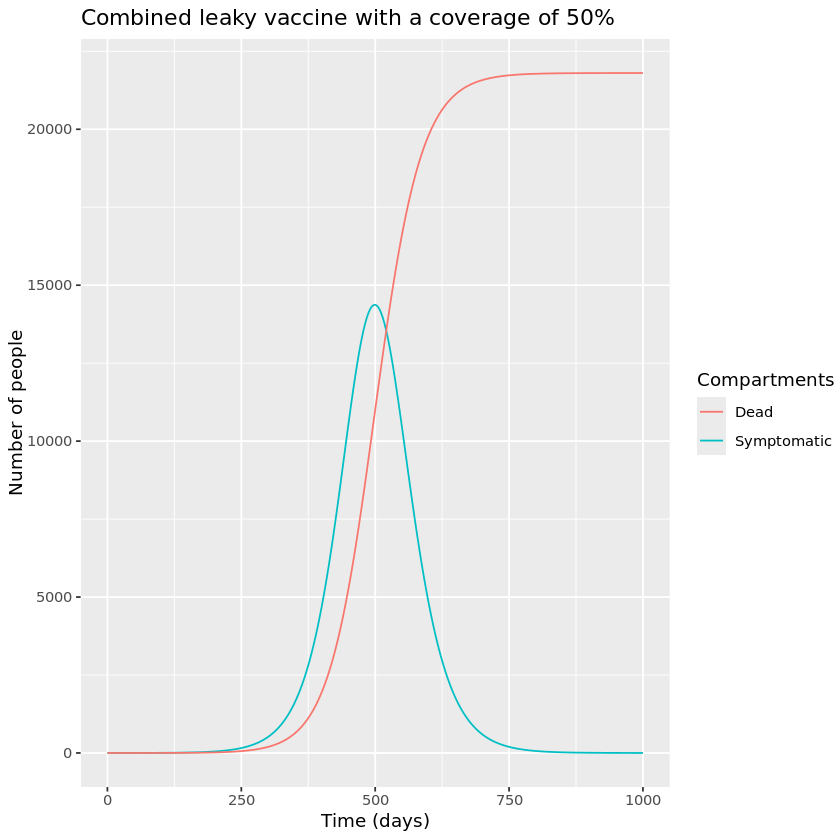

In [35]:
# plot of number of symptomatic people and number of deaths without vaccination
ggplot(data = output,                                               
       aes(x = time)) + 
  geom_line(aes(y = Im+Is, colour = "Symptomatic")) +   
  geom_line(aes(y = M, colour = "Dead")) +        
  xlab("Time (days)")+                                                   
  ylab("Number of people") +                                      
  labs(colour = "Compartments", title = "No vaccine")

# plot of number of symptomatic people and number of deaths with vaccine(coverage of 50%)
ggplot(data = output_vacc,                                               
       aes(x = time)) + 
  geom_line(aes(y = Im+Is+Ivm+Ivs, colour = "Symptomatic")) +   
  geom_line(aes(y = M+Mv, colour = "Dead")) +        
  xlab("Time (days)")+                                                   
  ylab("Number of people") +                                      
  labs(colour = "Compartments", title = "Combined leaky vaccine with a coverage of 50%")

---

## Conclusions

This study provides a detailed analysis of Disease X using a compartmental SEAIR model to simulate disease progression and evaluate the impact of a vaccination intervention. The following conclusions were drawn:

### Key findings

1. Baseline model findings:
   The model accurately reflects the disease dynamics when calibrated to $\beta$ = 0.224691, with 10% of the population (100,000 individuals) symptomatic at the epidemic's peak.


2. Impact of vaccination:
   - Introducing a combined leaky vaccine with 50% coverage reduces peak symptomatic cases by **85.6%** (from 100,000 to 14,370).
   - Mortality rate declines from **5.08% to 2.18%**, representing a **57% reduction in deaths**.
   - The epidemic's peak is delayed by approximately **310 days**, providing critical time for healthcare systems to prepare.

### Public health implications

- These results highlight the significance of vaccination programs in controlling highly transmissible diseases.
- The delayed epidemic peak underscores the value of timely intervention to reduce healthcare strain.

### Limitations and future directions

- The model assumes lifelong vaccine-induced immunity and uniform population mixing, which may not be realistic in real-world settings.
- Future models should consider factors like waning immunity, spatial heterogeneity, and demographic characteristics for enhanced accuracy and applicability.

This study demonstrates the utility of compartmental models in guiding public health strategies and evaluating interventions during infectious disease outbreaks.
